In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
path = r'E:\career\Dataa\github\Machine-Learning-Courses\Machine-Learning-Course-Andrew-Ng\machine-learning-assignments\ex2'
os.chdir(path)

In [77]:
data = pd.read_csv('ex2data1.txt', header=None, names=['Exam 1', 'Exam 2', 'Admitted'])


data.head(10) 

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


In [78]:
data.describe()

,Exam 1,Exam 2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [79]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

Text(0, 0.5, 'Exam 2 Score')

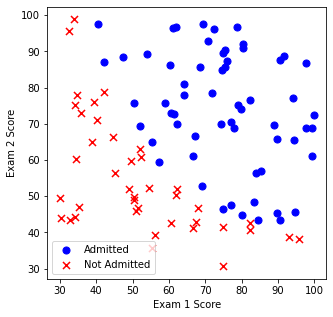

In [80]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

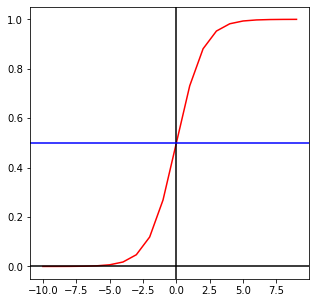

In [81]:

#sigmion fun
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(5,5));
ax.plot(nums, sigmoid(nums), 'r');
plt.axhline(0, color='black');
plt.axvline(0, color='black');
plt.axhline(.5, color='blue',label= '.5');

In [83]:
# add a ones column - this makes the matrix multiplication work out easier
data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

# convert to numpy arrays and initalize the parameter array theta
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(cols-1)


ValueError: cannot insert Ones, already exists

In [84]:
print()
print('X.shape = ' , X.shape)
print('theta.shape = ' , theta.shape)
print('y.shape = ' , y.shape)


X.shape =  (100, 3)
theta.shape =  (3,)
y.shape =  (100, 1)


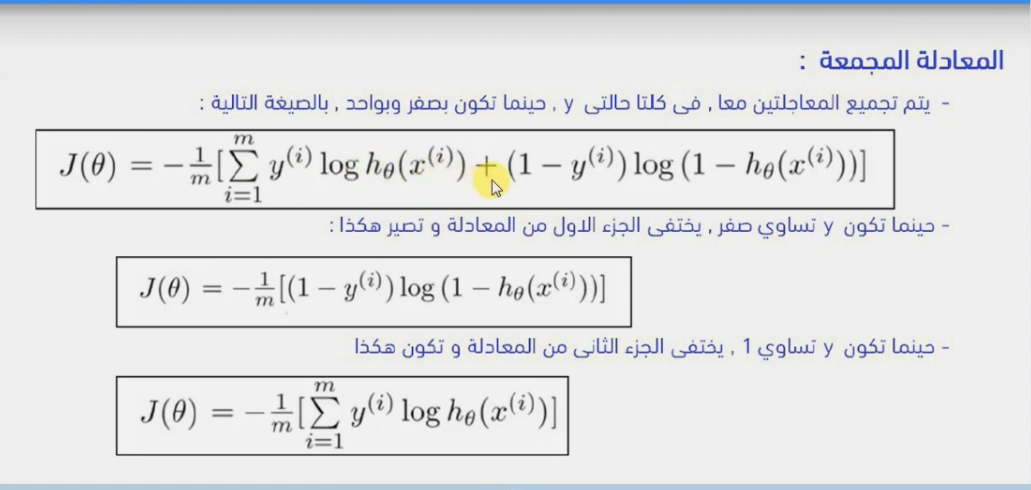

In [86]:
def cost(theta, X, y):
    theta = np.matrix(theta) #(1,n)
    X = np.matrix(X) # (m,n)
    y = np.matrix(y) #(m,1)
    H_x = X * theta.T #(m,n) * (n,1) = (m,1)
    first = np.multiply(-y, np.log(sigmoid(H_x))) #y >> (m,1), 
    second = np.multiply((1 - y), np.log(1 - sigmoid(H_x)))
    m = len(X)
    return (np.sum(first - second) / m)


In [111]:
theta = np.zeros(cols-1)
theta

array([0., 0., 0.])

In [108]:
theta = np.zeros(cols-1)
theta = np.matrix(theta)
theta

matrix([[0., 0., 0.]])

In [110]:
parameters = int(theta.ravel().shape[1])
grad = np.zeros(parameters)
grad

array([0., 0., 0.])

In [ ]:
.ravel

In [47]:
def gradient(theta, X, y):
    theta = np.matrix(theta) #(1,n)
    X = np.matrix(X) # (m,n)
    y = np.matrix(y) #(m,1)
    H_x = X * theta.T #(m,n) * (n,1) = (m,1)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(H_x) - y #(n,1)
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i]) #x>> [all rows + (col1,2,3)]
        grad[i] = np.sum(term) / len(X)
    
    return grad

In [65]:
def predict(theta, X):
    theta = np.matrix(theta)
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [66]:
thiscost = cost(theta, X, y)
print('cost before optimize = ' , thiscost)


cost before optimize =  0.6931471805599453


In [67]:
finaltheta = gradient(theta, X, y)
finaltheta

array([ -0.1       , -12.00921659, -11.26284221])

In [68]:
predictions = predict(finaltheta, X)

<ipython-input-42-09e8b952c2cb>:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


In [69]:
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 40%


In [101]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))

In [102]:
theta_opt = result[0]

In [75]:
opt.fmin_tnc?

In [103]:
costafteroptimize = cost(theta_opt, X, y)
print('cost after optimize = ' , costafteroptimize)

cost after optimize =  0.20349770158947425


In [88]:
predictions = predict(theta_opt, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 89%
